# Try visualisation methods on mass cytometry data
Data obtained from [Wishbone package](https://github.com/ManuSetty/wishbone)

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import plotly
plotly.offline.init_notebook_mode() # run at the start of every ipython notebook
import plotly.plotly as py
import pcatsneOnMassCyto  # local library for plotting
import pandas as pd
import numpy as np
import bhtsne
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
# use seaborn plotting style defaults
sns.set()

In [2]:
doInteractive = True
def interactivePlots(fig, axes):
    # helper function to decide to use plotly interactive plots or not
    if(doInteractive):
        plotly.offline.iplot_mpl(fig, show_link=False, strip_style=True) # offline ipython notebook 
    

# Read data

In [3]:
d = pd.read_csv('datawishbone/masscytof.csv', index_col=0)
d = d.loc[::12, :]  # subsample every 12 point
pt = pd.read_csv('datawishbone/wishbone_cytof_trajectory.csv', index_col=0,names=['PT']).loc[::12]
branch = pd.read_csv('datawishbone/wishbone_cytof_branch.csv', index_col=0, names=['Branch']).loc[::12]
print('data shape\n', d.shape)

assert pt.size == branch.size
assert d.shape[0] == pt.size
print(d.head())
print(pt.head())
branch.head()

data shape
 (2084, 13)
       CD117     CD127      CD24      CD25      CD27       CD3       CD4  \
0   0.631900  0.762374  4.736089  0.000000  2.012297  0.094659  4.149813   
12  0.994284  0.450959  4.463901  0.000000  3.259342  2.581764  4.216355   
24  0.211813  0.000000  4.477489  0.096251  1.868467  0.000000  3.842687   
36  1.035416  0.236976  4.207901  0.942251  2.630137  1.097812  3.774345   
48  0.565392  0.000000  4.062813  0.000000  2.863996  1.226079  3.620921   

        CD44       CD5     CD62L      CD69       CD8      TCRb  
0   0.706692  2.544785  1.572907  0.476556  3.580922  0.000000  
12  2.228262  4.336102  0.330548  1.722312  2.634172  2.109737  
24  0.331685  1.313929  0.253477  0.386133  3.425257  0.116337  
36  0.000000  2.229581  0.000000  0.370280  3.705279  1.591052  
48  2.648411  2.192727  1.232868  0.965464  3.239540  0.607027  
          PT
0   0.595120
12  0.658975
24  0.594314
36  0.596857
48  0.596594


,Branch
0,1
12,1
24,1
36,1
48,1


# Calculate PCA

In [4]:
F, Wt, X_proj, fracs = pcatsneOnMassCyto.do_pca(d)

In [5]:
fig=plt.figure(figsize=(5, 5))
plt.plot(np.cumsum(fracs))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
interactivePlots(fig, None)

# tSNE projection - fitting takes about 15 seconds

In [6]:
tsne = bhtsne.tsne(d, perplexity=30)

# Interactive widgets

In [7]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

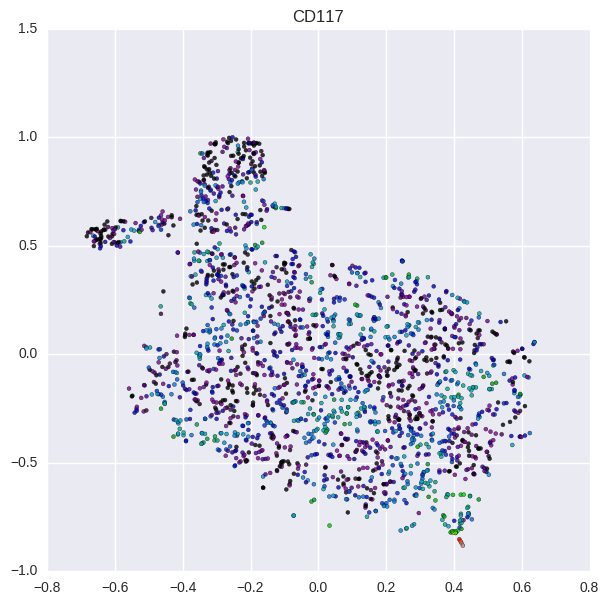

In [8]:
def plotinteractTSNE(strGene):
    if(strGene == 'pt'):
        ds = pt
    elif(strGene == 'branch'):
        ds = branch
    else:
        ds = d[strGene]
    pcatsneOnMassCyto.plot(tsne, [ds], [strGene], ngrid=(1, 1), figsize=(7, 7))
_=interact(plotinteractTSNE, strGene=list(d.columns.values)+['pt']+['branch'])

<function __main__.plotinteractPCA>

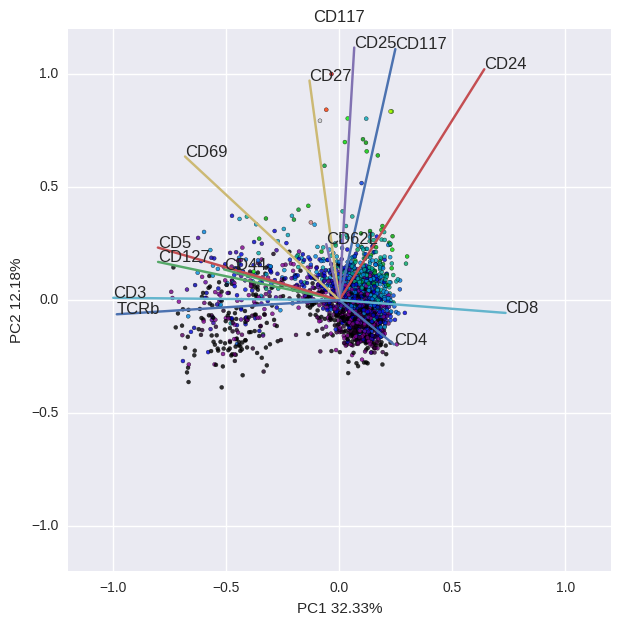

In [9]:
def plotinteractPCA(strGene, showPC):
    if(strGene == 'pt'):
        ds = pt
    elif(strGene == 'branch'):
        ds = branch
    else:
        ds = d[strGene]    
    if(showPC):
        _=pcatsneOnMassCyto.make_pca_plot(X_proj, Wt, F, [ds], [strGene], 
                                          figsize=(7, 7), ngrid=(1, 1))
    else:
        pcatsneOnMassCyto.plot(X_proj, [ds], [strGene], ngrid=(1, 1), figsize=(7, 7))
interact(plotinteractPCA, strGene=list(d.columns.values)+['pt']+['branch'], showPC=True)

# Plot individual gene expressions

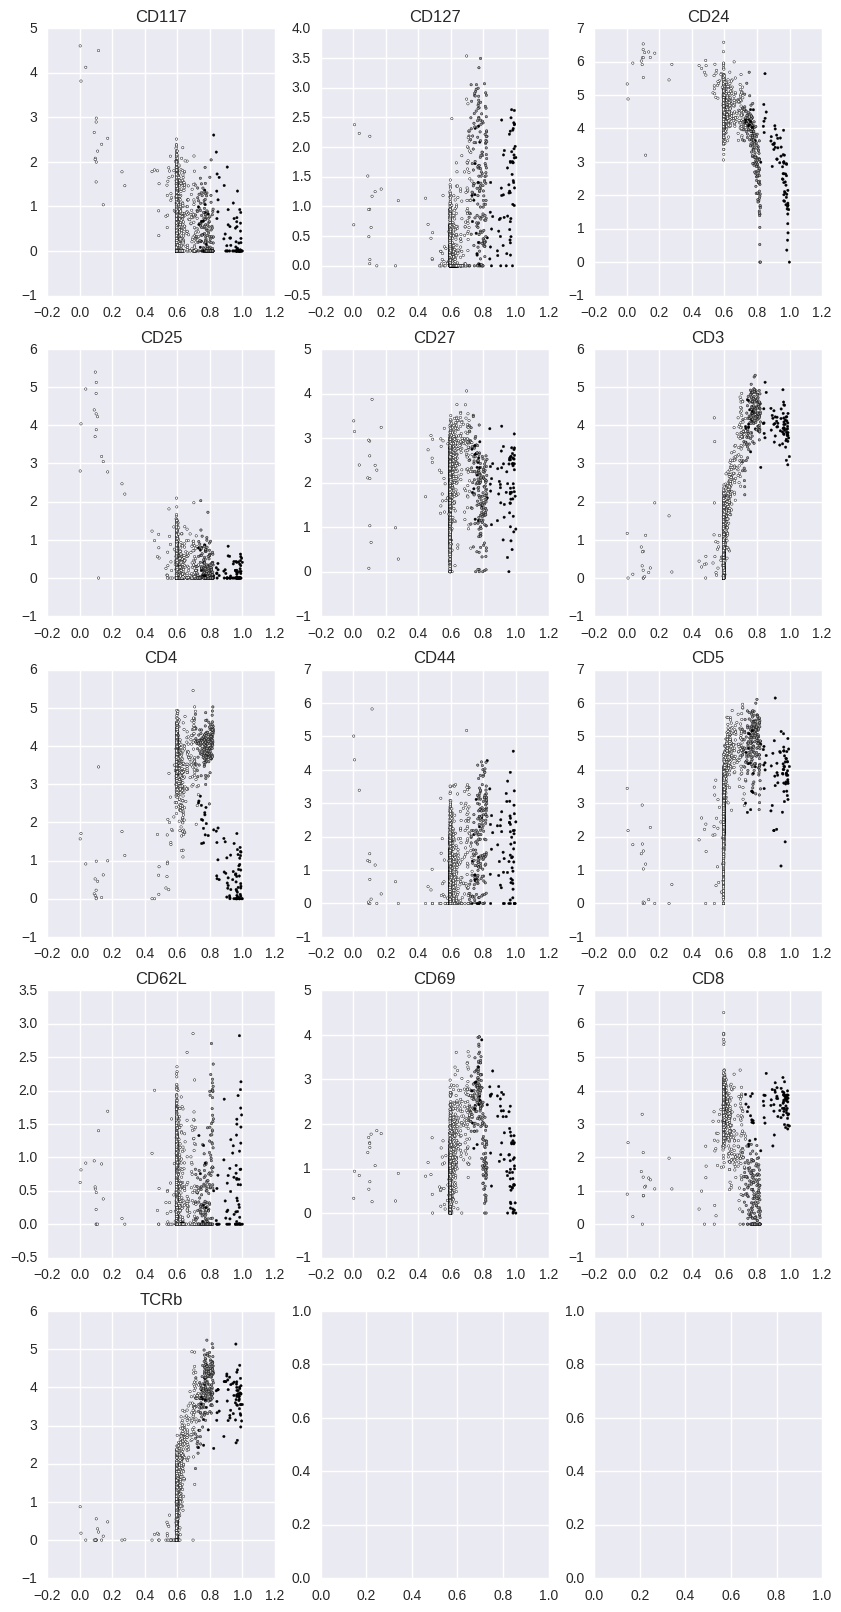

In [59]:
f, ax = plt.subplots(5, 3, figsize=(10, 20))
ax = ax.flatten()
for ig, g in enumerate(d.columns):
    ax[ig].scatter(pt, d[g], c=branch, s=3)
    ax[ig].set_title(g)
# interactivePlots(f, ax)